In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
import io


In [2]:
cv2.imread("imagedata/train/healthy/p1003.bmp").shape


(240, 320, 3)

In [3]:
train = ImageDataGenerator(rescale= 1/255)
test = ImageDataGenerator(rescale=1/255)


In [4]:
train_dataset = train.flow_from_directory("imagedata/train/", target_size= (200,200), batch_size =3, class_mode= 'binary' )

test_dataset = test.flow_from_directory("imagedata/test/", target_size=(200,200), batch_size=3, class_mode='binary')



Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [5]:
test_dataset.class_indices

{'healthy': 0, 'short': 1}

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')])

In [10]:
model.compile(loss='binary_crossentropy', optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics = ['accuracy'])

In [11]:
model_fit = model.fit(train_dataset,steps_per_epoch=3,epochs=10,validation_data=test_dataset)

Epoch 1/10
3/3 [==============================] - 2s 414ms/step - loss: 10.8263 - accuracy: 0.5556 - val_loss: 0.6675 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 1s 331ms/step - loss: 0.8010 - accuracy: 0.5556 - val_loss: 0.5572 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 1s 359ms/step - loss: 0.5255 - accuracy: 0.5556 - val_loss: 0.5513 - val_accuracy: 0.9333
Epoch 4/10
3/3 [==============================] - 1s 379ms/step - loss: 0.3244 - accuracy: 0.8889 - val_loss: 0.4011 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 1s 343ms/step - loss: 0.0926 - accuracy: 1.0000 - val_loss: 0.1997 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 352ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.1165 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 432ms/step - loss: 0.1293 - accuracy: 1.0000 - val_loss: 0.1211 - val_accuracy: 1.0000
Epoch 8/10
3/3 [===

In [12]:
test_dataset.class_indices

{'healthy': 0, 'short': 1}

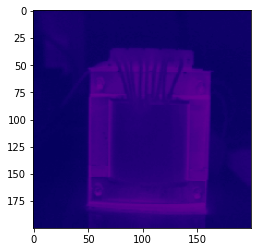

Transformer is Healthy


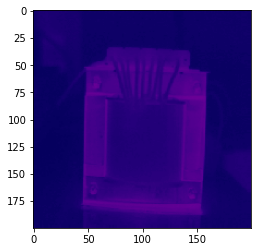

Transformer is Healthy


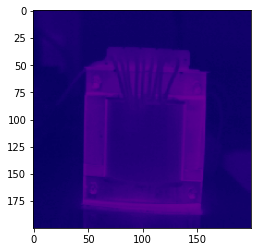

Transformer is Healthy


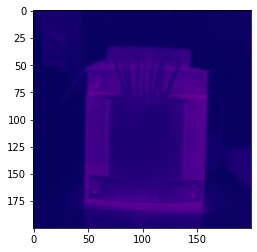

Transformer is Healthy


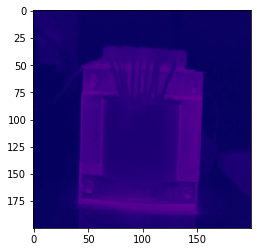

Transformer is Healthy


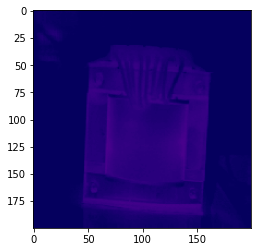

Transformer is Healthy


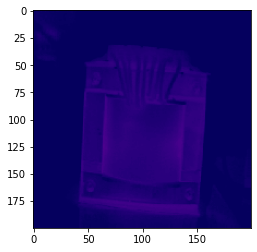

Transformer is Healthy


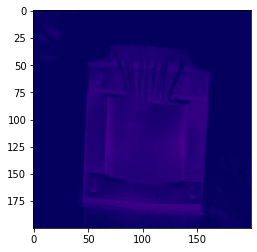

Transformer is Healthy


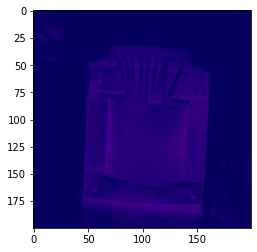

Transformer is Healthy


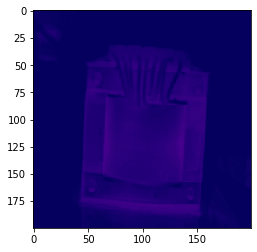

Transformer is Healthy


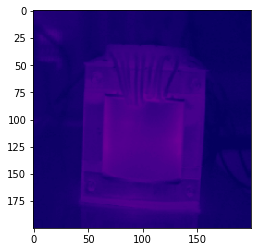

Transformer is Healthy


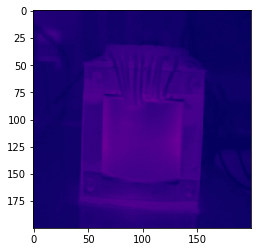

Transformer is Healthy


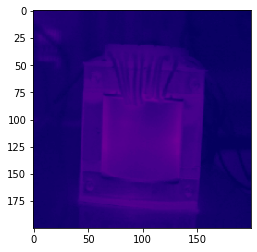

Transformer is Healthy


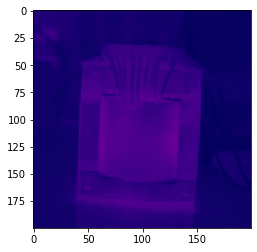

Transformer is Healthy


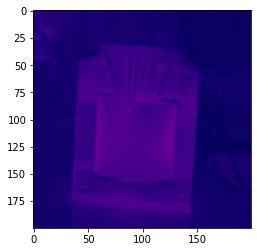

Transformer is Healthy


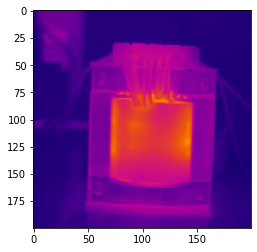

Transformer is Faulty


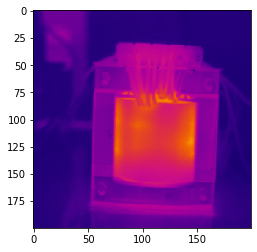

Transformer is Faulty


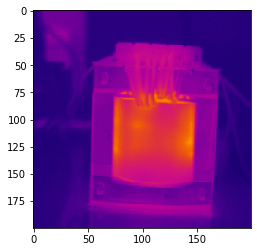

Transformer is Faulty


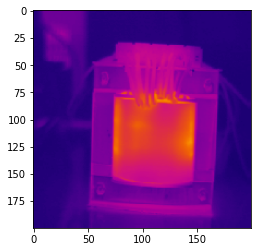

Transformer is Faulty


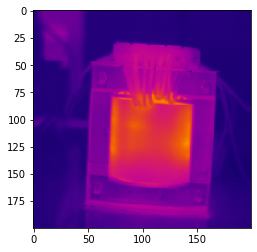

Transformer is Faulty


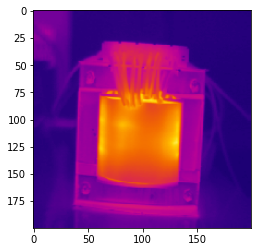

Transformer is Faulty


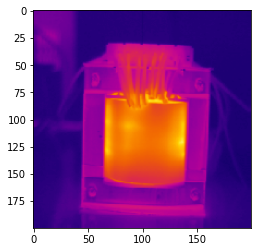

Transformer is Faulty


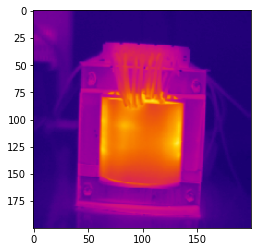

Transformer is Faulty


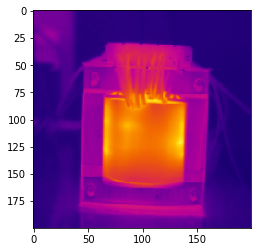

Transformer is Faulty


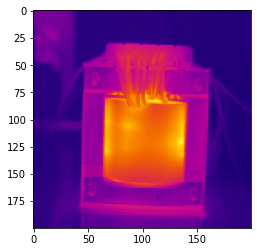

Transformer is Faulty


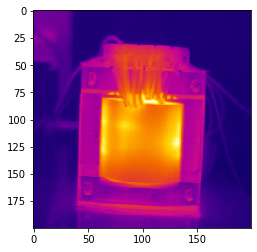

Transformer is Faulty


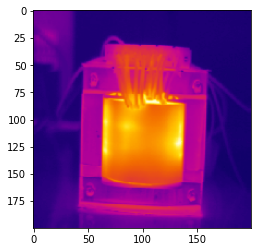

Transformer is Faulty


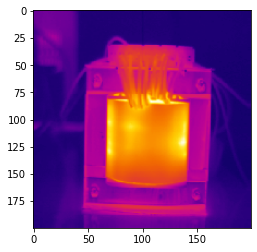

Transformer is Faulty


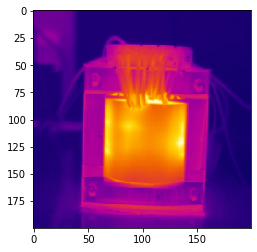

Transformer is Faulty


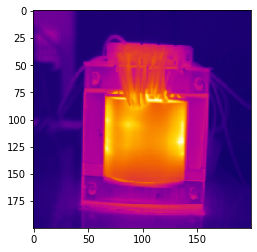

Transformer is Faulty


In [13]:
dir_path = 'imagedata/validation'

img_dir1 = 'imagedata/validation/p1011.bmp'
img_dir2 = 'imagedata/validation/p7036.bmp'

img_list = ['p1011.bmp', 'p7036.bmp' ]
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/'+ i , target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    value = model.predict(images)
    if  value ==0:
        print('Transformer is Healthy')
    else:
        print('Transformer is Faulty')
# for i in img_list:
#     img = image.load_img(dir_path+'/'+ i , target_size=(200,200))
#     plt.imshow(img)
#     plt.show()

#     X = image.img_to_array(img)
#     X = np.expand_dims(X, axis=0)
#     images = np.vstack([X])
#     value = model.predict(images)
#     if  value ==0:
#         print('Transformer is Healthy')
#     else:
#         print('Transformer is Faulty')

    


In [1]:
import joblib


In [18]:
joblib.dump(model,'model_joblib')

INFO:tensorflow:Assets written to: ram://3a6c9edb-08fd-4256-baee-adfef7295406/assets


['model_joblib']

In [2]:
mb = joblib.load('model_joblib')

2022-04-02 12:09:55.850752: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


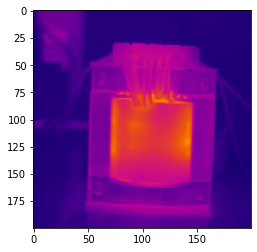

Transformer is Faulty


In [6]:

img_dir1 = 'imagedata/validation/p7036.bmp'
img = image.load_img(img_dir1 , target_size=(200,200))
plt.imshow(img)
plt.show()

X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
images = np.vstack([X])
value = mb.predict(images)
if  value ==0:
    print('Transformer is Healthy')
else:
    print('Transformer is Faulty')

